# case3 drug review, predict rating multiclass classifier with RNNnetworks
Cognitive Systems for Health Technology Applications<br>
15.3.2019, Lauri Solin<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

useful links for sources:

Especially Great thanks to our teacher Sakari Lukkanen for giving example code for keras!

Also thanks to our cognitive systems math teacher Vesa Ollikainen for giving stopwords lemmatization code example

also professor Jason Brownlee had great materials online so I definitely read his materials also

https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

https://www.kaggle.com/sakarilukkarinen/demo-02-checking-the-metrics

https://machinelearningmastery.com/make-predictions-long-short-term-memory-models-keras/

https://github.com/sakluk/cognitive-systems-for-health-technology/blob/master/Week_2_Case_1_(drafty_notes).ipynb



https://shrikar.com/deep-learning-with-keras-and-python-for-multiclass-classification/

https://www.kaggle.com/moghazy/predecting-rating-based-on-reviews

https://www.kaggle.com/sakarilukkarinen/embedding-lstm-gru-and-conv1d?scriptVersionId=11256850

https://stackoverflow.com/questions/45047266/keras-sparse-categorical-crossentropy-loss-function-output-shape-didnt-match


## What to do...

* make multiclass classifier with RNN/LSTM/GRU based model, and use it to classify drug review texts and predict the category (1-5)
* predict the multiclass type of drug rating based on the drug reviews
* give metrics about accuracy, cohen's kappa, classification report
* maybe 4-5 categories from the numeric drug review ratings and try to classify converted ratings, based on the drug reviews
* I will try to use embedding layer and word embedding, and it appears one-hot coding of labels may be necessary also (multiclass)

* use nltk libraries preprocessing for the raw string reviews so you discard stopwords and hopefully lemmatize also

* hope for the best! and print the results near the end

## ´Brownlee's original model served as inspiration (but original model overfitted I think, so I reduced it)

In [1]:
"""# LSTM with Dropout for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))"""

'# LSTM with Dropout for sequence classification in the IMDB dataset\nimport numpy\nfrom keras.datasets import imdb\nfrom keras.models import Sequential\nfrom keras.layers import Dense\nfrom keras.layers import LSTM\nfrom keras.layers import Dropout\nfrom keras.layers.embeddings import Embedding\nfrom keras.preprocessing import sequence\n# fix random seed for reproducibility\nnumpy.random.seed(7)\n# load the dataset but only keep the top n words, zero the rest\ntop_words = 5000\n(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)\n# truncate and pad input sequences\nmax_review_length = 500\nX_train = sequence.pad_sequences(X_train, maxlen=max_review_length)\nX_test = sequence.pad_sequences(X_test, maxlen=max_review_length)\n# create the model\nembedding_vecor_length = 32\nmodel = Sequential()\nmodel.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(100))\nmodel.add(Dropout(0.2))\nmodel.add(D

## Data preprocessing

In [2]:
# basic library imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import compute_class_weight
from keras import optimizers
from sklearn.utils import shuffle
from keras.utils import to_categorical
from time import time, localtime, strftime

import os
print(os.listdir("../input"))

Using TensorFlow backend.


['drugsComTest_raw.csv', 'drugsComTrain_raw.csv']


In [3]:
"""common settings for model training, remember to choose!!!"""

MOSTCOMMONWORDS = 2000 #WORDS = 1000
REVIEWLENGTH = 400 #LENGTH = 100
SAMPLES = 10000 #N = 10000
WORDEMBEDDIM = 12
opt0 = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
opt1 = optimizers.RMSprop()
EPOCHS = 20
enableStopwords = True

MODELNAME = "brownleeConv1D_LSTM"
VERBOSE = 2
BATCHSIZE = 32
VALIDATIONPERCENT = 0.25
#CW = cw #classweights

In [4]:
# Read the training data
data = pd.read_csv('../input/drugsComTrain_raw.csv')
data = shuffle(data)
data.head(1000)

,uniqueID,drugName,condition,review,rating,date,usefulCount
58208,208043,Suprep Bowel Prep Kit,Bowel Preparation,"""Effective, HOWEVER it is gross! I threw up ab...",10,16-Apr-14,9
53797,155061,Metronidazole,Trichomoniasis,"""I have been taking it and on my seventh day t...",9,19-Jul-16,15
131253,30782,Miconazole,Vaginal Yeast Infection,"""I just used this about an hour ago &amp; I ha...",10,30-Jun-17,0
38975,153299,Doxycycline,Acne,"""I started taking Doxycycline because I was in...",9,22-Dec-14,30
53933,134312,Prednisone,Rheumatoid Arthritis,"""Prednisone has been a saviour at being a quic...",10,17-Feb-16,58
157798,22925,Apremilast,Plaque Psoriasis,"""I started with the starter pack, and when I w...",1,19-Sep-17,4
111881,171542,Wellbutrin,Depression,"""This drug was not for me. Its very stimulatin...",2,3-Dec-12,82
77585,118289,Naltrexone,Alcohol Dependence,"""I am a professional woman with a wonderful fa...",9,17-Jul-16,75
103935,103768,Ethinyl estradiol / levonorgestrel,Abnormal Uterine Bleeding,"""Going on 2 months now. I had 16 days of extre...",3,23-Apr-15,1
138568,160068,Alirocumab,High Cholesterol,"""I have experienced debilitating leg pain, bro...",9,4-Mar-16,44


## replace the "&#039"; with the proper character '

In [5]:
## here we must add the proper character single quote ' into the dataset so that nltk will work nicely with it

if enableStopwords:
    data['review'] = data['review'].str.replace("&#039;", "'", regex=False)
    data.head(1000)

## make the 5 class labels from the numeric ratings [0,1,2,3,4]

In [6]:
# Create multiclass classifier labels from numeric ratings
# NOTE! you can use the \ character for multiline python statements!

r = data['rating']
labels = \
1* ((0 <= r) & ( r <= 2))  \
+ 2*((3 <= r) & (r <= 4)) \
+ 3*((5 <= r) & (r <= 6)) \
+ 4*((7 <= r) & (r <= 8)) \
+ 5*((9 <= r) & (r <= 10))

labels = labels -1 #this prevents class errors from later on, so now the classes should be from 0 to including 4

data['label'] = labels
data.head(15)

,uniqueID,drugName,condition,review,rating,date,usefulCount,label
58208,208043,Suprep Bowel Prep Kit,Bowel Preparation,"""Effective, HOWEVER it is gross! I threw up ab...",10,16-Apr-14,9,4
53797,155061,Metronidazole,Trichomoniasis,"""I have been taking it and on my seventh day t...",9,19-Jul-16,15,4
131253,30782,Miconazole,Vaginal Yeast Infection,"""I just used this about an hour ago &amp; I ha...",10,30-Jun-17,0,4
38975,153299,Doxycycline,Acne,"""I started taking Doxycycline because I was in...",9,22-Dec-14,30,4
53933,134312,Prednisone,Rheumatoid Arthritis,"""Prednisone has been a saviour at being a quic...",10,17-Feb-16,58,4
157798,22925,Apremilast,Plaque Psoriasis,"""I started with the starter pack, and when I w...",1,19-Sep-17,4,0
111881,171542,Wellbutrin,Depression,"""This drug was not for me. Its very stimulatin...",2,3-Dec-12,82,0
77585,118289,Naltrexone,Alcohol Dependence,"""I am a professional woman with a wonderful fa...",9,17-Jul-16,75,4
103935,103768,Ethinyl estradiol / levonorgestrel,Abnormal Uterine Bleeding,"""Going on 2 months now. I had 16 days of extre...",3,23-Apr-15,1,1
138568,160068,Alirocumab,High Cholesterol,"""I have experienced debilitating leg pain, bro...",9,4-Mar-16,44,4


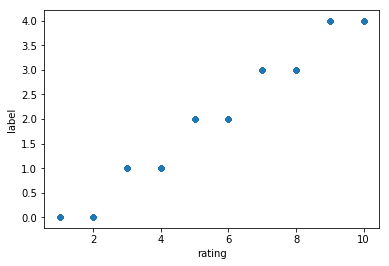

In [7]:
# double check that the ratings and labels distribution worked
data.plot(x = 'rating', y = 'label', kind = 'scatter')
plt.show()


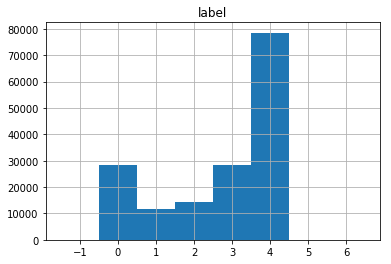

In [8]:
# show labels histogram and distribution
data.hist(column = 'label', bins = np.arange(-1, 8), align = 'left');


In [9]:

# get some information about the length of the review texts, to see how big they tend to be
data['review_length'] = data['review'].apply(len)
data['review_length'].describe()

count    161297.000000
mean        450.591710
std         237.742759
min           3.000000
25%         258.000000
50%         447.000000
75%         679.000000
max       10547.000000
Name: review_length, dtype: float64

In [10]:
data['label'].describe(), data['label'].unique()


(count    161297.000000
 mean          2.723888
 std           1.542212
 min           0.000000
 25%           2.000000
 50%           3.000000
 75%           4.000000
 max           4.000000
 Name: label, dtype: float64, array([4, 0, 1, 3, 2]))

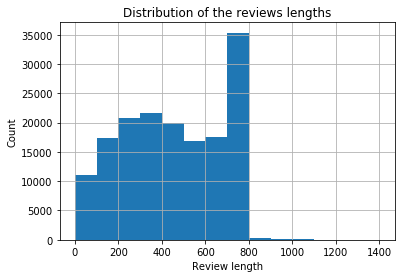

In [11]:
# histogram of review_lengths of the reviews
data.hist('review_length', bins = np.arange(0, 1500, 100));
plt.title('Distribution of the reviews lengths')
plt.xlabel('Review length')
plt.ylabel('Count')
plt.show()


## make classweights with sklearn to use for models
* EDIT:: I wasn't sure if one-hot coding will actually work well with class weights from sklearn, I read about some conflicting information that 
maybe class_weights doesn't work so well with one hot labels

In [12]:
"""w = compute_class_weight('balanced', np.unique(data['label']), data['label'])
cw = {0:w[0], 1:w[1], 2:w[2], 3:w[3], 4:w[4]}
cw"""

"w = compute_class_weight('balanced', np.unique(data['label']), data['label'])\ncw = {0:w[0], 1:w[1], 2:w[2], 3:w[3], 4:w[4]}\ncw"

## Text pre-processing

1.  sample total amount of reviews
1.  tokenize
1.  form dictionary of most common words
1. make to sequences
1. padding/cutoff into equal length sequences

In [13]:

# Read a part of the reviews and create training sequences (x_train)
samples = data['review'].iloc[:SAMPLES]

testsamples = data['review'].iloc[SAMPLES : 2*SAMPLES] ##get test_data, and later on get test_targets, so we can compare results



## attempt to use proper preprocessing nltk with stopwords and lemmatization

In [14]:
"""for the preprocessing with stopwords and lemmatization, I recommend the episode of Karpon Parhaat episode 12, from 11:56 onwards
https://youtu.be/rovKTI7_35o?t=717

It's absolutely glorious video about patient diagnosis audio dictation, where doctors themselves typically omit
useless words for diagnosis, but this results in hilarious results for the actual patient history (based on the audio
dictation) (finnish language only of course!)
"""

"""attempt to use nltk tokenizing and lemmatization with stopwords so we dont get 'garbage in, garbage out' phenomenon.
nltk stopwording and lemmatizations should help firstly with stopwords so that the useless English words like
'you', 'me' 'I' dont end up spamming our later keras tokenizer because those are very common words but they are 
also useless really for any kind of analysis in a traditional sense of text analysis. These kinds of useless
English words are also harmful probably for our keras model, because it tries to make sense of garbage words, that 
are very common, but of low informatinal value.

Also, lemmatization should make only the basic version of the word available into the keras tokenizing, such as
drugs's turns into drug which is the base word
"""


import nltk
import urllib.request
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

"""helper function from Vesa Ollikainen's example code for text analytics"""
def stopword_and_lemmatize(review):
    
    tokens = review.split()
    tokens=[token.lower() for token in tokens if token.isalpha()]
    sw = stopwords.words('english')
    ctokens = tokens
    for token in tokens:
        if token in sw:
            ctokens.remove(token)
    lemmatizer = WordNetLemmatizer()
    for i in range(len(ctokens)):
        ctokens[i] = lemmatizer.lemmatize(ctokens[i])
        

    return ' '.join(ctokens)

"""checking the results of stopword_and_lemmatize on samples
from my point of view it looked like at least the stopwords functioned
properly, I'm not sure if the lemmatization really worked???!!!"""

print("original was:\n", samples.head(5))
if enableStopwords:
    str0 = samples.apply(stopword_and_lemmatize)
    print("transformed was:\n",str0.head(5))
    samples = str0 ##assigns the lemmatized and stopworded series into the samples, GOOD
    str1 = testsamples.apply(stopword_and_lemmatize)
    testsamples =str1



original was:
 58208     "Effective, HOWEVER it is gross! I threw up ab...
53797     "I have been taking it and on my seventh day t...
131253    "I just used this about an hour ago &amp; I ha...
38975     "I started taking Doxycycline because I was in...
53933     "Prednisone has been a saviour at being a quic...
Name: review, dtype: object
transformed was:
 58208     however is threw about cup i still ok my proce...
53797     been taking and my seventh day taking last pil...
131253    used about hour ago say feeling immediate wa l...
38975     started taking doxycycline malaria it my docto...
53933     been saviour being quick fix getting rid cripp...
Name: review, dtype: object


In [15]:

tokenizer = Tokenizer(num_words = MOSTCOMMONWORDS)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
x_train = pad_sequences(sequences, maxlen = REVIEWLENGTH)

tokenizer1 = Tokenizer(num_words = MOSTCOMMONWORDS)
tokenizer1.fit_on_texts(testsamples)
testsequences = tokenizer1.texts_to_sequences(testsamples)
x_test = pad_sequences(testsequences, maxlen = REVIEWLENGTH) ##test_data, and later we will get test_targets in one hot coded way


## Convert labels to one-hot-categories (shouldlnt be necessary with sparse_crossentropy)
* EDIT:: actually it was necessary because I got poor results accuracy== 0 when using sparse_categoricalcrossentropy,
so that I just switched back to the regular categorical_crossentropy loss function. And to use the plain old categorical_crossentropy there was the one-hot-coding of labels

In [16]:
"""
# Convert the labels to one_hot_category values
"""
#train_labels = labels[:SAMPLES]
one_hot_labels = to_categorical(labels[:SAMPLES], num_classes = 5)

testlabels = labels[SAMPLES : 2*SAMPLES]
one_hot_testtargets = to_categorical(testlabels, num_classes = 5)

# Check the training and label sets
x_train.shape, one_hot_labels.shape

((10000, 400), (10000, 5))

## Helper functions

In [17]:
# We use the same plotting commands several times, so create a function for that purpose
def plot_history(history):
    f, ax = plt.subplots(1, 2, figsize = (16, 7))
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.sca(ax[0])
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.sca(ax[1])
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    
# Similarly create a function for model training, for demonstration purposes we use constant values
def train_model(model, x, y, e = EPOCHS, bs = BATCHSIZE, v = VERBOSE, vs = VALIDATIONPERCENT):
    h = model.fit(x, y, batch_size = bs, epochs = e,  verbose = v, validation_split = vs)
    return h

## prof Jason Brownlee's adapted model with LSTM and conv1D

In [18]:
# Seventh model: Embedding -> 2 x Conv1D + MaxPooling -> GRU -> Dense
m7 = Sequential()
m7.add(Embedding(MOSTCOMMONWORDS, WORDEMBEDDIM, input_length = REVIEWLENGTH))
m7.add(Conv1D(filters=WORDEMBEDDIM, kernel_size=3, padding='same', activation='relu'))
m7.add(MaxPooling1D(pool_size=2))
m7.add(LSTM(units = WORDEMBEDDIM, dropout = 0.4, recurrent_dropout = 0.4))
m7.add(Dropout(0.4))
m7.add(Dense(5, activation = 'softmax'))
m7.compile(optimizer = opt1, loss = 'categorical_crossentropy', metrics = ['acc'])
m7.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 12)           24000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 400, 12)           444       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 200, 12)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 65        
Total params: 25,709
Trainable params: 25,709
Non-trainable params: 0
_________________________________________________________________


Train on 7500 samples, validate on 2500 samples
Epoch 1/20
 - 80s - loss: 1.4463 - acc: 0.4687 - val_loss: 1.3432 - val_acc: 0.4952
Epoch 2/20
 - 79s - loss: 1.3640 - acc: 0.4753 - val_loss: 1.2967 - val_acc: 0.4952
Epoch 3/20
 - 77s - loss: 1.3046 - acc: 0.4875 - val_loss: 1.2532 - val_acc: 0.5208
Epoch 4/20
 - 78s - loss: 1.2687 - acc: 0.5108 - val_loss: 1.2299 - val_acc: 0.5408
Epoch 5/20
 - 78s - loss: 1.2434 - acc: 0.5235 - val_loss: 1.2199 - val_acc: 0.5444
Epoch 6/20
 - 79s - loss: 1.2148 - acc: 0.5367 - val_loss: 1.2175 - val_acc: 0.5476
Epoch 7/20
 - 77s - loss: 1.2065 - acc: 0.5377 - val_loss: 1.2126 - val_acc: 0.5436
Epoch 8/20
 - 78s - loss: 1.1915 - acc: 0.5493 - val_loss: 1.2058 - val_acc: 0.5552
Epoch 9/20
 - 77s - loss: 1.1782 - acc: 0.5460 - val_loss: 1.2087 - val_acc: 0.5412
Epoch 10/20
 - 79s - loss: 1.1748 - acc: 0.5495 - val_loss: 1.2064 - val_acc: 0.5444
Epoch 11/20
 - 77s - loss: 1.1618 - acc: 0.5571 - val_loss: 1.2139 - val_acc: 0.5528
Epoch 12/20
 - 78s - loss:

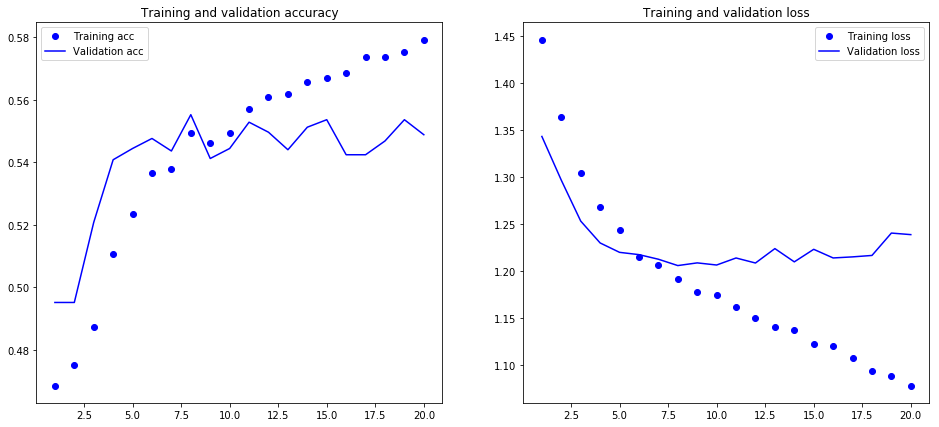

In [19]:
# Train and plot the history
h7 = train_model(m7, x_train, one_hot_labels)
plot_history(h7)

In [20]:
##save trained model
model_name = strftime('Case3-%Y-%m-%d-%H%M%S', localtime()) + MODELNAME
print('modelname was=',model_name,'\n')


# Save the model
m7.save(model_name)
print('')
print('Model saved to file:', model_name)
print('')

modelname was= Case3-2019-03-17-175247brownleeConv1D_LSTM 


Model saved to file: Case3-2019-03-17-175247brownleeConv1D_LSTM



## metrics helper function for confusionMatrix, cohenKappa and classificationReport

In [21]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import accuracy_score
import warnings

# Function to display confusion matrix, classification report and final accuracy
def display_results(model, test_data, test_targets):
    # Get the true and predicted values
    y_true = test_targets
    predict = model.predict(test_data)
    y_pred = np.argmax(predict, axis = 1)

    

    # Calculate and print the metrics results

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    
        cm = confusion_matrix(y_true, y_pred)
        print('Confusion matrix:')
        print(cm)
        print('')

        a = accuracy_score(y_true, y_pred)
        print('Accuracy: {:.4f}'.format(a))
        print('')

        cr = classification_report(y_true, y_pred)
        print('Classification report:')
        print(cr)
        
        print('')
        k = cohen_kappa_score(y_true, y_pred, weights = 'quadratic')
        print("Quadratic weighted Cohen's kappa score = {:.4f}".format(k))

## make sanity check what we get from our LSTM+conv1D model, with testdata and testlabels and predicts

In [22]:
# Get the true labels for testdata and check them
y_true = testlabels
print(y_true)



4380      2
89215     4
15904     4
132778    3
143040    1
74416     1
154796    0
111786    0
104901    2
131042    4
118160    4
73904     4
47679     0
25954     4
41233     4
112679    0
65271     2
9234      3
45095     0
124518    4
9025      4
110640    4
103852    0
37303     4
81956     4
86312     4
117811    3
96971     4
116975    3
149195    4
         ..
128094    4
25584     0
86338     3
86161     3
6915      4
152979    4
66181     3
17601     0
80692     0
81677     4
57115     4
36010     4
80235     3
46608     4
159434    3
105548    4
136814    4
127232    4
50052     0
77798     4
144628    4
36540     4
84706     4
88058     2
89012     4
67036     4
125547    4
104312    4
37053     3
18517     0
Name: rating, Length: 10000, dtype: int64


In [23]:
## get the predicts based on testdata and check them also
predicts = m7.predict(x_test)
print(predicts )
print('')

[[0.12276106 0.06255524 0.12234443 0.25544658 0.43689275]
 [0.03463692 0.02014852 0.06118011 0.26019248 0.62384194]
 [0.00861831 0.00536598 0.02311186 0.17934862 0.7835552 ]
 ...
 [0.21690375 0.10382414 0.15341537 0.23602839 0.28982833]
 [0.05969066 0.03047718 0.07847586 0.23068538 0.600671  ]
 [0.05812021 0.03441991 0.08507166 0.26716825 0.55522   ]]



In [24]:
## transform the predicts into regular format, from the one hot coding
y_pred = np.argmax(predicts, axis = 1)
print(y_pred)
print('')

## check what it predicted
print(np.unique(y_pred))

[4 4 4 ... 4 4 4]

[0 3 4]


In [25]:

##print confusionMatrix, classificationReport, weightedCohenKappa,
display_results(m7, x_test, testlabels)

Confusion matrix:
[[ 446    0    0    3 1320]
 [ 169    0    0    0  532]
 [ 218    0    0    1  677]
 [ 339    0    0    5 1433]
 [ 985    0    0   17 3855]]

Accuracy: 0.4306

Classification report:
              precision    recall  f1-score   support

           0       0.21      0.25      0.23      1769
           1       0.00      0.00      0.00       701
           2       0.00      0.00      0.00       896
           3       0.19      0.00      0.01      1777
           4       0.49      0.79      0.61      4857

   micro avg       0.43      0.43      0.43     10000
   macro avg       0.18      0.21      0.17     10000
weighted avg       0.31      0.43      0.34     10000


Quadratic weighted Cohen's kappa score = 0.0477


##  brownlee's model 1st run

1. it heavily overfits quite fast, but the good thing is that in hybrid models conv1D and RNN the training time is short and train acc is very good
2. I will attempt add more dropout layers to the brownlee model after maxpool and lstm most likely

## brownlee's model 2nd run
1.  the results were such that it still overfits quite heavily, so that trainacc is very high at 0.7 at the end,  and trainloss dropped nicely, but validationacc stalled, and validation loss increased

2. changes for next run: reduce LSTM units = 32, increase all dropouts =0.4. NOTE:: according to keras documentation lstm dropout only affects inputs to that lstm, so that I decided to put originally a plain old dropout layer immediately after the LSTM layer, and recurrent_dropout only affects recurrent state weights according to keras docs 

3. I will drop plain old dropout from between maxpool and LSTM because it seems not necessary


> dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.


> recurrent_dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the recurrent state.

4. hope for the best, and train for 20 epochs

## brownlee's model 3rd run
1. the results were such that it still overfits quite heavily
2. I noticed that the embedding layer has the largest percentage of parameters (160000/ 171589= 0.93 = 93% of all trainables was inside embedded layer), so that if we want to reduce overfitting, we must use smaller and smaller embedding layer worddimension
3. currently the wordembeddim = 32, which in my opinion results in the overfit because vast majority of trainable parameters are there in the wordembeddings, but learning those parameters doesn't seem to help in getting good validation accuracy at all, and validation loss was bad also.
4. changes for the next run must include diminishing the wordembeddim = 12 or something small like that, also reduce the units in LSTM, and reduce units in the Convfilters
5. also reduce mostcommonwords=2000, it has effect on embedded layer trainable parameters

## more optimizations
* it appears that the embedding layer parameters= wordembedDimension x dictionarySize, so that we should maybe try to keep wordEmbed dimension smaller, and maybe then increase the dictionarySize a bit
* then, we can attempt to increase model complexity to see if the rest of the model (not embedded parameters only) is able to learn anything
* keep hyperparameters same as gru+dropout version (dictSize= 1000, reviewlength=500, embeddim = 8), train for 15 epochs

## Settled down version brownleeLSTM+ conv1D

* I decided that ultimately the "brownlee model" was still little bit overfitting, because I tried keeping same layers, but increasing LSTM units,  and conv filter amounts, and the result
was that the overfitting became worse, and therefore started at earlier stage in epochs

* commit 6 from this notebook gave a relatively good fit, and I will base this final commit version on that commit 6 model's architecture. where the 

> reviewlength=400, 

> mostcommonwords = 2000, 

> wordembeddim=12, 

> samples=10000, 

> epochs= 20, 

> optimizer= RMSprop with default learnrate, 

> nltk preprocessing was used

> trainable parameters can be found in this notebook's model summary


* the model was not perfect and it was more difficult to optimize the convnet + LSTM style architectures because there wasn't a clear sense how much the conv1D filters affect the situation.


## other "worthwhile" and good architectures that I tried to optimize were: 

1. teacher's GRU+dropout,  commit 5  https://www.kaggle.com/late347/case3-rnn-predictdrugreview-gru-drop
2. and teacher's dual stack GRU with dropout, commit 4  https://www.kaggle.com/late347/case3-rnn-predictdrugreview-stackofgrus
3. teacher's conv1D + GRU, commit 9  https://www.kaggle.com/late347/case3-rnn-predictdrugreview-conv1d-gru





## Overall results from "Brownlee conv1D+LSTM"

1.  it appears that the model predictions were quite bad based on the cohen kappa score being so low
2. also test accuracy was a bit low compared to validation accuracy 
3. also it seems that the sanity check revealed that the model essentially trained on the wrong things, because it only predicted so heavily either 0 or 4. 
4.  same can be seen in the confusion matrix also.
5.  This was very depressing because the validation accuracy and trainign accuracy had a good trendline, at least, but the underlying model apparently was based on false pretences in a sense
6. possible remedies could be to implement properly class_weights into the model training because the ratingslabels from [0, 1, 2, 3, 4] were a bit unbalanced in the beginning
7. alternatively there is a way to re-sample to data such that you get certain amount of random ratingslabels for each category, but it was a bit difficult to code
8. if there is a way to introduce the class_weights properly into softmax classifier, then the other option could be to test the model with raw unprocessed reviewtexts, vs the nltk text review preprocessing and see if there was any difference. (certainly from validationphase it didn't seem to make huge diference either way)
9. other avenue of research could have been to increase the SAMPLES from 10000 to something of a bigger slice from the traindataset and see how much longer it would take to train the model, and to see if there was any differences in test set results


10. currently the trainingtime per epoch = 115s in the kaggle, which was a bit on the good side of the "patience-barrier" for my own patience. But the other stacked GRUs and LSTMs usually took a huge amount of time to train.